# Create new letters

In [ ]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

from src.data.load_data import load_sample_x_y
from src.plot.image import plot_grid_of_letters
from src.utils.misc import init_notebook

In [ ]:
init_notebook()

In [ ]:
X, y = load_sample_x_y()

In [ ]:
X.min()

np.int64(0)

First, let us reduce the dimension

In [ ]:
pca = PCA(0.99)  # , whiten=True)
data = pca.fit_transform(X / 255)

In [ ]:
print(f"number of features:\nbefore {X.shape[1]}\nafter {data.shape[1]}")

number of features:
before 784
after 240


In [ ]:
# In this cell: training with various number of clusters to find best AIC
# n_components = np.arange(50, 210, 10)
# models = [
#     GaussianMixture(n, covariance_type="full", random_state=0) for n in n_components
# ]
# aics = [model.fit(data).aic(data) for model in models]
# plt.plot(n_components, aics);

In [ ]:
gmm = GaussianMixture(250, covariance_type="full", random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [ ]:
data_new, _labels = gmm.sample(100)
data_new.shape

(100, 240)

In [ ]:
letters_new = pca.inverse_transform(data_new)

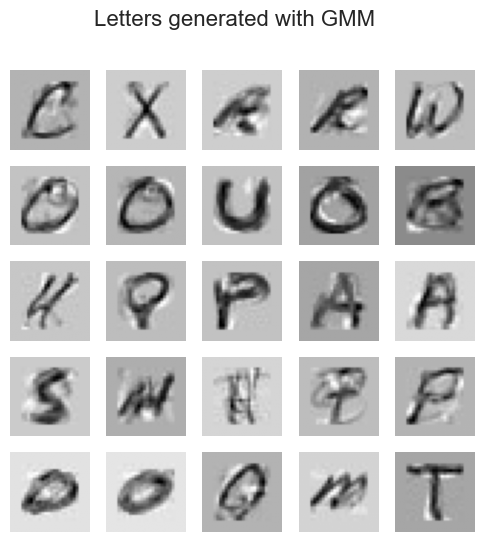

In [ ]:
title = "Letters generated with GMM"
plot_grid_of_letters(letters_new, title=title)

In [ ]:
# Beautify created letters with manually-set threshold
letters_new_threshold = letters_new.copy()
letters_new_threshold[letters_new_threshold < 0.1] = 0
letters_new_threshold[letters_new_threshold > 0.9] = 1

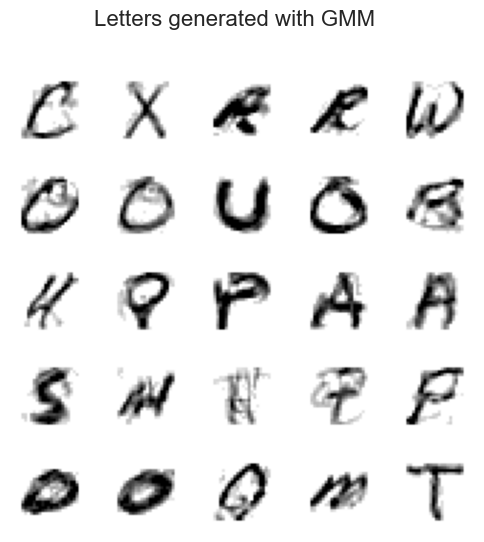

In [ ]:
title = "Letters generated with GMM"
plot_grid_of_letters(letters_new_threshold, title=title)